In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
rootdir = 'asl_alphabet_train'
filepaths = []
for root, subdirs, files in os.walk(rootdir):
    for filename in files:
        filepath = os.path.join(root, filename)
        filepaths.append(filepath)
df = pd.DataFrame({ 'filepath': filepaths })
df

,filepath
0,asl_alphabet_train/asl_alphabet_train/.DS_Store
1,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg
2,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg
3,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg
4,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg
...,...
86996,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg
86997,asl_alphabet_train/asl_alphabet_train/W/W407.jpg
86998,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg
86999,asl_alphabet_train/asl_alphabet_train/W/W361.jpg


Extract file names from file paths.

Extract class and image index from filename.

In [94]:
import os.path 
# filename
df['filename'] = df['filepath'].map(os.path.basename)
# class and index
regex = r'(?P<class>[a-zA-Z]+)(?P<index>[0-9]+).jpg'
class_index = df['filename'].str.extract(regex)
df = df.join(class_index)
# drop NaN classes and indexes
df = df.drop(df[df['class'].isna() | df['index'].isna()].index)
df

,filepath,filename,class,index
1,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg,R2837.jpg,R,2837
2,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg,R2189.jpg,R,2189
3,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg,R1480.jpg,R,1480
4,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg,R1494.jpg,R,1494
5,asl_alphabet_train/asl_alphabet_train/R/R2823.jpg,R2823.jpg,R,2823
...,...,...,...,...
86996,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg,W2943.jpg,W,2943
86997,asl_alphabet_train/asl_alphabet_train/W/W407.jpg,W407.jpg,W,407
86998,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg,W1292.jpg,W,1292
86999,asl_alphabet_train/asl_alphabet_train/W/W361.jpg,W361.jpg,W,361


In [95]:
df['class'].unique()

array(['R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del',
       'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B',
       'K', 'L', 'Y', 'P', 'W'], dtype=object)

Find distribution of classes

<AxesSubplot:xlabel='class', ylabel='Count'>

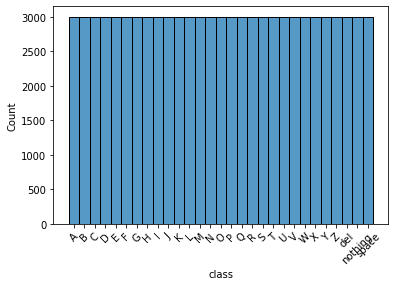

In [96]:
plt.xticks(rotation=45)
sns.histplot(data=df.sort_values('class'), x='class')

Display some example images.

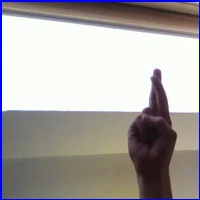

In [97]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

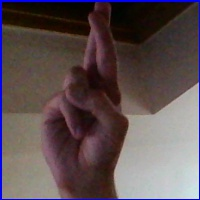

In [98]:
Image(filename=df['filepath'].values[1])

## Keras/Tensorflow style
Do the same, but now Keras/Tensorflow style

In [132]:
import tensorflow as tf
tf

<module 'tensorflow' from '/Users/dunnkers/Library/Python/3.8/lib/python/site-packages/tensorflow/__init__.py'>

In [ ]:
model.predict

In [102]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
train_ds

Found 87000 files belonging to 29 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 29)), types: (tf.float32, tf.float32)>

In [151]:
class_names = np.array(train_ds.class_names)
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

Text(0.5, 1.0, "['P']")

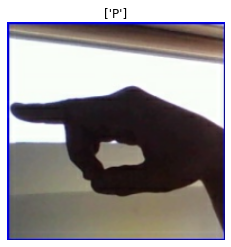

In [182]:
first_batch = iter(train_ds.take(1))
first_sample = next(first_batch)
images, labels = first_sample

i = 0
label, = np.where(labels[i])
image = images[i]
plt.imshow(image.numpy().astype("uint8"))
plt.axis("off")
plt.title(class_names[label])

In [187]:
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[  0.        ,   0.        , 239.        ],
        [  0.        ,   0.        , 239.        ],
        [  0.        ,   0.        , 236.80357   ],
        ...,
        [  0.        ,   0.        , 240.60712   ],
        [  0.        ,   0.        , 244.35718   ],
        [  0.        ,   0.        , 241.        ]],

       [[  0.        ,   0.        , 238.16072   ],
        [  0.        ,   0.        , 227.59471   ],
        [  4.3013396 ,   3.0723855 , 212.9289    ],
        ...,
        [  5.3654556 ,   1.2289615 , 200.72601   ],
        [  1.4088157 ,   0.53951156, 214.35262   ],
        [  0.        ,   3.357143  , 220.85715   ]],

       [[  5.1250005 ,   0.        , 239.46428   ],
        [  6.353955  ,   1.8434312 , 212.12755   ],
        [ 57.81315   ,  52.492035  , 206.18686   ],
        ...,
        [147.56567   , 143.17311   , 238.41675   ],
        [129.79176   , 128.1677    , 231.98398   ],
        [  9.51785

In [196]:

pretrained_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3), alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, classes=1000, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax'
)
pretrained_model

In [186]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

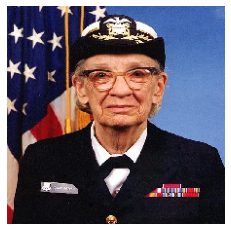

In [193]:
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)


In [194]:
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
x

array([[[[-0.8039216 , -0.78039217, -0.3490196 ],
         [-0.7647059 , -0.7490196 , -0.27058822],
         [-0.7411765 , -0.73333335, -0.20784312],
         ...,
         [-0.42745095, -0.12941176,  0.45882356],
         [-0.4823529 , -0.18431371,  0.4039216 ],
         [-0.56078434, -0.26274508,  0.32549024]],

        [[-0.8039216 , -0.78039217, -0.3490196 ],
         [-0.8117647 , -0.79607844, -0.31764704],
         [-0.81960785, -0.8117647 , -0.30196077],
         ...,
         [-0.38823527, -0.10588235,  0.47450984],
         [-0.36470586, -0.08235294,  0.49803925],
         [-0.32549018, -0.04313725,  0.5372549 ]],

        [[-0.8352941 , -0.8117647 , -0.38039213],
         [-0.81960785, -0.8039216 , -0.32549018],
         [-0.77254903, -0.7647059 , -0.25490195],
         ...,
         [-0.27843136,  0.01176476,  0.5686275 ],
         [-0.36470586, -0.0745098 ,  0.48235297],
         [-0.3490196 , -0.05882353,  0.49803925]],

        ...,

        [[ 0.27058828, -0.92156863, -0

In [197]:
result_before_save = pretrained_model(x)

decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]
decoded

array(['black stork', 'letter opener', 'nematode', 'space shuttle',
       'screw'], dtype='<U30')